# Results on Quantum Hardware

This notebook loads the data used for the experiment on a Quantum Annealer. BC = Binary Clustering, SS = Subset Sum.

In [19]:
import pickle

import matplotlib        as mpl
import matplotlib.pyplot as plt
import numpy             as np

from matplotlib.colors import CenteredNorm
from qubolite          import qubo
from dimod             import SampleSet

Subset Sum Data
Values:
    a1  = 297
    a2  = 19
    a3  = 0
    a4  = 48
    a5  = 6
    a6  = 10
    a7  = 12
    a8  = 44
    a9  = 8
    a10 = 8
    a11 = 12
    a12 = 747
    a13 = 21
    a14 = 20
    a15 = 31
    a16 = 20779
Target: 66


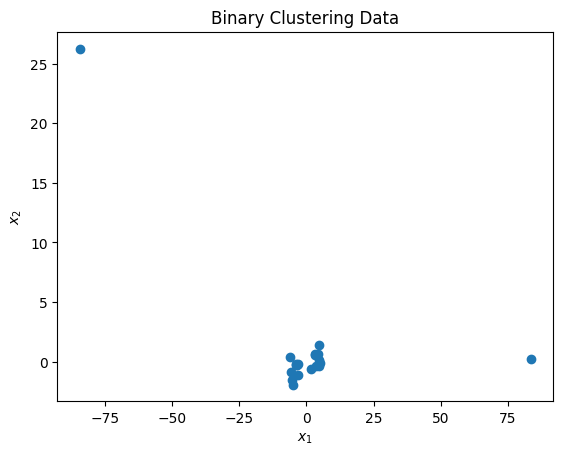

In [14]:
data_BC = np.load('Data_BinClustering.npy')
data_SS = np.load('Data_SubsetSum.npz')

# plot BC data
fig, ax = plt.subplots()
ax.scatter(data_BC[:,0], data_BC[:,1])
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title('Binary Clustering Data')

# print SS data
print('Subset Sum Data')
print(f'Values:')
for i, v in enumerate(data_SS['values'], 1):
    print(f'    a{i: <2} = {v}')
print(f'Target: {data_SS["target"]}')

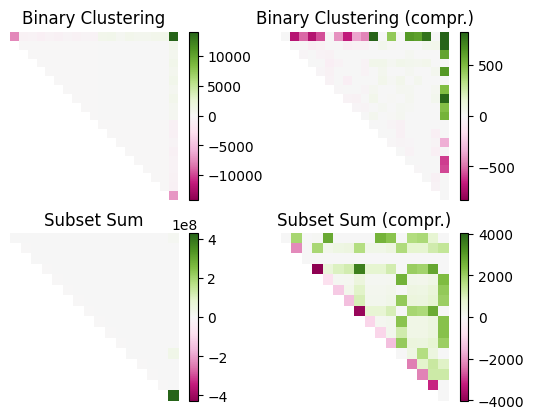

In [16]:
# load QUBO instances
Q_BC  = qubo.load('BinClustering.qubo')
Q_BCc = qubo.load('BinClustering_compressed.qubo')
Q_SS  = qubo.load('SubsetSum.qubo')
Q_SSc = qubo.load('SubsetSum_compressed.qubo')

def plot_qubo(ax, Q, title=None):
    ax.set_axis_off()
    mask = np.tri(Q.n, k=-1)
    m = np.ma.array(Q.m, mask=mask)
    cm = mpl.colormaps['PiYG'].copy()
    cm.set_bad('w')
    handle=ax.imshow(m, norm=CenteredNorm(), cmap=cm, interpolation='none')
    plt.colorbar(handle)
    ax.set_title(title)
    return ax

fig, axes = plt.subplots(2, 2)
plot_qubo(axes[0,0], Q_BC,  title='Binary Clustering')
plot_qubo(axes[0,1], Q_BCc, title='Binary Clustering (compr.)')
plot_qubo(axes[1,0], Q_SS,  title='Subset Sum')
plot_qubo(axes[1,1], Q_SSc, title='Subset Sum (compr.)')
fig.show()

In [20]:
with open('DWaveResults_BinClustering.pickle', 'rb') as f:
    BC_raw, BCc_raw = pickle.load(f)
result_BC  = SampleSet.from_serializable(BC_raw)
result_BCc = SampleSet.from_serializable(BCc_raw)
    
with open('DWaveResults_SubsetSum.pickle', 'rb') as f:
    SS_raw, SSc_raw = pickle.load(f)
result_SS  = SampleSet.from_serializable(SS_raw)
result_SSc = SampleSet.from_serializable(SSc_raw)

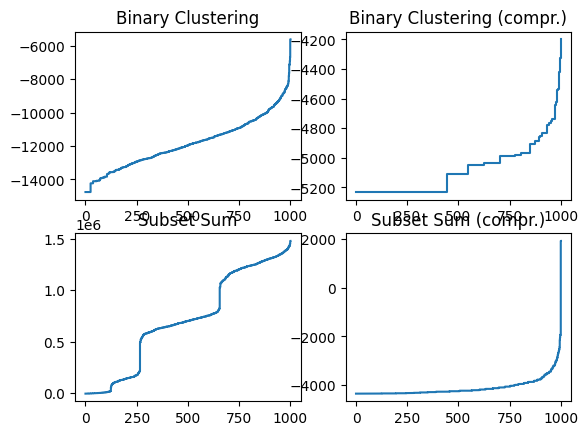

In [32]:
def plot_energy(ax, result, title=None):
    e, r = zip(*result.data(fields=['energy', 'num_occurrences'], sorted_by='energy', name=None))
    x = np.r_[0, np.cumsum(r)]
    ax.plot(x, np.r_[e, e[-1]], drawstyle='steps-post')
    ax.set_title(title)
    
fig, axes = plt.subplots(2, 2)
plot_energy(axes[0,0], result_BC,  title='Binary Clustering')
plot_energy(axes[0,1], result_BCc, title='Binary Clustering (compr.)')
plot_energy(axes[1,0], result_SS,  title='Subset Sum')
plot_energy(axes[1,1], result_SSc, title='Subset Sum (compr.)')
#fig.title('Quantum Annealer Samples')
fig.show()